# Lectures 2-3

We have defined a time series as a collection of random variables indexed by time. In the following lectures I want to do two things. 

First, I want to show you that time series data need not have the typical macro/financial flavor that you have seen before (such as quarterly GDP growth, or daily quotes for the federal funds rate). To do so, I will give you an example of a time series of "text data". 

In terms of coding, we will learn how to 

- Extract text from a pdf file
- Store text in a python [data frame](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.html)
- Manipulate the columns of a data frame

Second, I want to start introducing some notation that we will use throught the rest of the course. Today we will answer the following questions: 

- What is the mean function of a time series?
- What does we mean when we say that two random variables are independent?
- What is the autocorrelation function of a time series?




## a) A time series of text data

The term **"monetary policy"** refers to the actions undertaken by a central bank, such as the Federal Reserve in the United States, to influence the availability and cost of money and credit to help promote national economic goals (such as growth and price stability). 

[Monetary policy in the United States](https://www.federalreserve.gov/monetarypolicy.htm) comprises the Federal Reserve's **actions** and **communications** to promote 

- maximum employment 
- stable prices
- moderate long-term interest rates

These are the three economic goals the U.S. Congress has instructed the Federal Reserve to pursue.

The Federal Reserve conducts the nation's monetary policy by managing the level of short-term interest rates and influencing the overall availability and cost of credit in the economy. Monetary policy directly affects short-term interest rates; it indirectly affects longer-term interest rates, currency exchange rates, and prices of equities and other assets and thus wealth. Through these channels, monetary policy influences household spending, business investment, production, employment, and inflation.


In the United States, the Federal Reserve controls three tools of monetary policy: 

1) [The discount rate](https://www.federalreserve.gov/monetarypolicy/discountrate.htm) (interest rate charged to commercial banks and other depository institutions on overnight loans they receive from the their regional Federal Reserve Bank's lending facility; also known as the discount window)

2) [Reserve requirements](https://www.federalreserve.gov/monetarypolicy/reservereq.htm) (the amount of funds that a depository institution must hold in reserve against specified deposit liabilities)

3) [Open Market Operations](https://www.federalreserve.gov/monetarypolicy/openmarket.htm) (the purchase and sale of securities in the open market). The **Federal Open Market Committee** (FOMC) is the body direcly responsible for open market operations. The FOMC holds eight regularly scheduled meetings per year. At these meetings, the Committee reviews economic and financial conditions, determines the appropriate stance of monetary policy (typically by setting a target for the federal funds rate), and assesses the risks to its long-run goals of price stability and sustainable economic growth.

Before the financial crisis of 2008, The Federal Reserve used Open Market Operations to adjust the supply of reserve balances so as to keep the federal funds rate--the interest rate at which depository institutions lend reserve balances to other depository institutions overnight--around the target established by the FOMC (the DFEDTAR series we plotted last class). 

From the end of 2008 through October 2014, the Federal Reserve used open market purchases of longer-term securities with the goal of putting downward pressure on longer-term interest rates.

The **FOMC transcripts**, which provide a detailed record of FOMC meeting proceedings are available from 1936 to 2013. In this class, we will take a look at a subset of them; namely those corresponding to the Greenspan era.






## a.1) Opening pdfs and extracting their text

Under the material for Lectures 2-3 I have added a folder called FOMC_pdf. This folder contains the transcripts of all the meetings that took place during the [Greenspan](https://en.wikipedia.org/wiki/Alan_Greenspan) era (August 11, 1987 to January 31st, 2006). 

We will write a few lines of code to extract the text from those pdfs. 

We will start by importing a package (or using a more appropriate terminology: a module). You can read the first paragraph of this [link](https://www.datacamp.com/community/tutorials/modules-in-python) to get a sense of what a module is. We will review them in more detail later in the course. Broadly speaking, a module is a collection of "functions".

The first module we will import today is the "operating module" system. This module is used to conduct operating system like tasks (such as opening a file, or listing the contents of a directory).

In [1]:
#load operating system module

import os

You can get a sense of the functions that belong to this module by typing

In [2]:
os.*?

You should not expect to learn all the functions of every modules. The typical way you will learn these is by trying to do some task, and checking for possible solutions on the web. 

For example, the code below extracts the names of all files in a particular directory. 

In [3]:
#Define the base directory containing the FOMC statements

base_directory = '../Data/FOMC_pdf'

In [4]:
#Return a list containing the name of the files in the directory

raw_doc        = os.listdir(base_directory)

In [5]:
#Sort the list in ascending order

filelist       = sorted(raw_doc)

You can type now raw_doc or filelist to see what those names are

In [6]:
filelist

['FOMC19870818meeting.pdf',
 'FOMC19870922meeting.pdf',
 'FOMC19871103meeting.pdf',
 'FOMC19871216meeting.pdf',
 'FOMC19880210meeting.pdf',
 'FOMC19880329meeting.pdf',
 'FOMC19880517meeting.pdf',
 'FOMC19880630meeting.pdf',
 'FOMC19880816meeting.pdf',
 'FOMC19880920meeting.pdf',
 'FOMC19881101meeting.pdf',
 'FOMC19881214meeting.pdf',
 'FOMC19890208meeting.pdf',
 'FOMC19890328meeting.pdf',
 'FOMC19890516meeting.pdf',
 'FOMC19890706meeting.pdf',
 'FOMC19890822meeting.pdf',
 'FOMC19891003meeting.pdf',
 'FOMC19891114meeting.pdf',
 'FOMC19891219meeting.pdf',
 'FOMC19900207meeting.pdf',
 'FOMC19900327meeting.pdf',
 'FOMC19900515meeting.pdf',
 'FOMC19900703meeting.pdf',
 'FOMC19900821meeting.pdf',
 'FOMC19901002meeting.pdf',
 'FOMC19901113meeting.pdf',
 'FOMC19901218meeting.pdf',
 'FOMC19910206meeting.pdf',
 'FOMC19910326meeting.pdf',
 'FOMC19910514meeting.pdf',
 'FOMC19910703meeting.pdf',
 'FOMC19910820meeting.pdf',
 'FOMC19911001meeting.pdf',
 'FOMC19911105meeting.pdf',
 'FOMC19911217meetin

Suppose now that I want to convert the text from the file 'FOMC19980929meeting.pdf' into a file containing strings. We will do so using the PyPDF2 module. 

Warning: Depending on your Python configuration, you might not be able to read this directly. I downloaded Python using the Anaconda distribution and I needed to type directly on the terminal

conda -forge pypdf2

After doing this, I was able to upload the PyPDF2 module

In [7]:
#Import module for reading pdfs

import PyPDF2

Let me give you an example of how the conversion from pdfs to string work. There are different ways of doing this (and in fact, there are some other modules out there to do it).

The first thing is to open the file of interest and storing into some python object. We can do this by running

In [8]:
pdfFileObj_example = open(base_directory + '/' + 'FOMC19980929meeting.pdf', 'rb')

The line above simply creates an object that PyPDF2 can then read:

In [9]:
pdfread_example    = PyPDF2.PdfFileReader(pdfFileObj_example) 

You can type PyPDF2.PdfFileReader? to see what PyPDF2.PdfFileReader does. For the moment let's think that the function breaks the pdf into number of pages and separately stores each of the pages. 

We can easily retrieve the number of pages in 'FOMC19980929meeting.pdf'

In [10]:
pdfread_example.numPages

124

And I can also get a particular page of the document, say page 1. 

In [11]:
pdfread_example.getPage(0).extractText()

'Meeting of the Federal Open Market CommitteeSeptember 29, 1998A meeting of the Federal Open Market Committee was held in the offices of the Boardof Governors of the Federal Reserve System in Washington, D.C., on Tuesday, September 29,1998, at 9:00 a.m.PRESENT:Mr. Greenspan, ChairmanMr. McDonough, Vice ChairmanMr. HoenigMr. FergusonMr. GramlichMr. JordanMr. KelleyMr. MeyerMs. MinehanMr. PooleMs. RivlinMessrs. Boehne, McTeer, Moskow, and Stern, Alternate Members of theFederal Open Market CommitteeMessrs. Broaddus, Guynn, and Parry, Presidents of the Federal ReserveBanks of Richmond, Atlanta, and San Francisco respectivelyMr. Kohn, Secretary and EconomistMr. Bernard, Deputy SecretaryMs. Fox, Assistant SecretaryMr. Gillum, Assistant SecretaryMr. Mattingly, General CounselMr. Baxter, Deputy General CounselMr. Truman, EconomistMessrs. Cecchetti, Dewald, Hakkio, Lindsey, Simpson, Sniderman, andStockton, Associate EconomistsMr. Fisher, Manager, System Open Market Account'

Finally, we would like to put all these pages together in a list. Doing so for two pages is quite simple. We start by creating a list

In [12]:
page_list_example = []

We can "append" the first page to this empty list by doing

In [13]:
page_list_example.append(''.join(pdfread_example.getPage(0).extractText().split('\n')))

In [14]:
page_list_example

['Meeting of the Federal Open Market CommitteeSeptember 29, 1998A meeting of the Federal Open Market Committee was held in the offices of the Boardof Governors of the Federal Reserve System in Washington, D.C., on Tuesday, September 29,1998, at 9:00 a.m.PRESENT:Mr. Greenspan, ChairmanMr. McDonough, Vice ChairmanMr. HoenigMr. FergusonMr. GramlichMr. JordanMr. KelleyMr. MeyerMs. MinehanMr. PooleMs. RivlinMessrs. Boehne, McTeer, Moskow, and Stern, Alternate Members of theFederal Open Market CommitteeMessrs. Broaddus, Guynn, and Parry, Presidents of the Federal ReserveBanks of Richmond, Atlanta, and San Francisco respectivelyMr. Kohn, Secretary and EconomistMr. Bernard, Deputy SecretaryMs. Fox, Assistant SecretaryMr. Gillum, Assistant SecretaryMr. Mattingly, General CounselMr. Baxter, Deputy General CounselMr. Truman, EconomistMessrs. Cecchetti, Dewald, Hakkio, Lindsey, Simpson, Sniderman, andStockton, Associate EconomistsMr. Fisher, Manager, System Open Market Account']

And then we can "append" page 2

In [15]:
page_list_example.append(''.join(pdfread_example.getPage(1).extractText().split('\n')))

In [16]:
page_list_example

['Meeting of the Federal Open Market CommitteeSeptember 29, 1998A meeting of the Federal Open Market Committee was held in the offices of the Boardof Governors of the Federal Reserve System in Washington, D.C., on Tuesday, September 29,1998, at 9:00 a.m.PRESENT:Mr. Greenspan, ChairmanMr. McDonough, Vice ChairmanMr. HoenigMr. FergusonMr. GramlichMr. JordanMr. KelleyMr. MeyerMs. MinehanMr. PooleMs. RivlinMessrs. Boehne, McTeer, Moskow, and Stern, Alternate Members of theFederal Open Market CommitteeMessrs. Broaddus, Guynn, and Parry, Presidents of the Federal ReserveBanks of Richmond, Atlanta, and San Francisco respectivelyMr. Kohn, Secretary and EconomistMr. Bernard, Deputy SecretaryMs. Fox, Assistant SecretaryMr. Gillum, Assistant SecretaryMr. Mattingly, General CounselMr. Baxter, Deputy General CounselMr. Truman, EconomistMessrs. Cecchetti, Dewald, Hakkio, Lindsey, Simpson, Sniderman, andStockton, Associate EconomistsMr. Fisher, Manager, System Open Market Account',
 "9/29/98Mr. Winn,

The list has now two entries

In [17]:
len(page_list_example)

2

but we would like to consolidate them into a single page and assign them to a list called document_example 

In [18]:
page_concat_example = ''.join(page_list_example)

In [19]:
document_example    = []

In [20]:
document_example.append(page_concat_example)

In [21]:
len(document_example)

1

Now we can do this in a loop. For each pdf, we will write a loop to put together all the pages. And then will put together all the meetings in a page. 

In [22]:
#Create loop to extract the text from the pdfs 
#(we could do this using the tika package, but it does not work on Chrome!)

document       =  []           #Initialize doc

for filename in filelist:      #Create loop for each of the names on the file
    
    pdfFileObj = open(base_directory + '/' + filename, 'rb')    
                               #Open file
     
    pdfread    = PyPDF2.PdfFileReader(pdfFileObj) 
                               #Get the content of the pdf (text,pages, etc)
    
    page_list  = []
    
    for page in range(pdfread.numPages):
        
        pageObj= pdfread.getPage(page)
        
        page_list.append(''.join(pageObj.extractText().split('\n')))
        
    page_concat= ''.join(page_list)
    
    document.append(page_concat)


In [23]:
len(document)

150

You can check that document is a list and each element of the list contains one of the meetings in the Greenspan period.

In [24]:
import pandas as pd

In [25]:
#load re to split the content of the pdfs by the occurrence of a pattern

import re

In [26]:
example = pd.concat([pd.DataFrame(data=[re.split('MR. |MS. |CHAIRMAN |VICE CHAIRMAN ', document[i])]) for i in range(len(document))],
...           ignore_index=True)

In [27]:
example.index

RangeIndex(start=0, stop=150, step=1)

In [28]:
example.set_index(pd.Series(data=filelist).apply(lambda x: x[4:12]),inplace=True)

In [29]:
example.loc['19980929'][1]

'GREENSPAN. We are getting under way a bit early, but I am sure wewill use the time productively. Would somebody like to move approval of the minutes? I wantto call your attention to the addition of a reference in the minutes to our recent telephoneconference. I trust all of you have looked at it and that there is no objection to the way it isworded.'

In [30]:
example.index

Index(['19870818', '19870922', '19871103', '19871216', '19880210', '19880329',
       '19880517', '19880630', '19880816', '19880920',
       ...
       '20041214', '20050202', '20050322', '20050503', '20050630', '20050809',
       '20050920', '20051101', '20051213', '20060131'],
      dtype='object', length=150)

In [31]:
example.loc['19980929']

0       Meeting of the Federal Open Market CommitteeSe...
1       GREENSPAN. We are getting under way a bit earl...
2                               MCDONOUGH. Move approval.
3       GREENSPAN. Without objection.The second item o...
4       HOENIG. Mr. Chairman, after reading the memo a...
5       GREENSPAN. I gather by implication that we hav...
6       HOENIG. We need an interpreter to figure out w...
7                             GREENSPAN. President Guynn.
8       GUYNN. Mr. Chairman, I share Tom Hoenig's view...
9       GREENSPAN. Tom, did you also say you favored r...
10      HOENIG. Yes, I would be in favor of releasing ...
11      GUYNN. I think it is important as we continue ...
12      GREENSPAN. As a central bank, we should at lea...
13         GUYNN. I accept that! Thank you, Mr. Chairman.
14                          GREENSPAN. President Minehan.
15      MINEHAN. I am very much in agreement with Pres...
16                            GREENSPAN. President Parry.
17      PARRY.

In [32]:
example.loc['19980929'][example.loc['19980929'].str.contains(r'(?=.*GREENSPAN)', na=False,regex=True)]

1      GREENSPAN. We are getting under way a bit earl...
3      GREENSPAN. Without objection.The second item o...
5      GREENSPAN. I gather by implication that we hav...
7                            GREENSPAN. President Guynn.
9      GREENSPAN. Tom, did you also say you favored r...
12     GREENSPAN. As a central bank, we should at lea...
14                         GREENSPAN. President Minehan.
16                           GREENSPAN. President Parry.
18                          GREENSPAN. President McTeer.
20                           GREENSPAN. Governor Rivlin.
22                            GREENSPAN. Governor Meyer.
24                        GREENSPAN. President Broaddus.
26                          GREENSPAN. President Boehne.
28                           GREENSPAN. President Stern.
30                         GREENSPAN. Governor Ferguson.
32                           GREENSPAN. President Poole.
34                         GREENSPAN. Governor Gramlich.
36                             

In [33]:
example.loc['19980929'][example.loc['19980929'].str.contains(r'(?=.*GREENSPAN)(?=.*inflation)', na=False,regex=True)]

93    GREENSPAN. There is an implicit forecast in th...
Name: 19980929, dtype: object

In [34]:
dates_meetings = pd.Series(data=filelist).apply(lambda x: x[4:12])

In [35]:
count_greenspan = pd.DataFrame(index=dates_meetings,columns=range(1))

In [36]:
for idates in dates_meetings.tolist():
    aux = example.loc[idates][example.loc[idates].str.contains(r'(?=.*GREENSPAN)(?=.*inflation)', na=False,regex=True)]
    count_greenspan.loc[idates]=len(aux)
    

In [37]:
import matplotlib.pyplot as plt

In [38]:
count_greenspan.set_index(pd.to_datetime(count_greenspan.index),inplace=True)

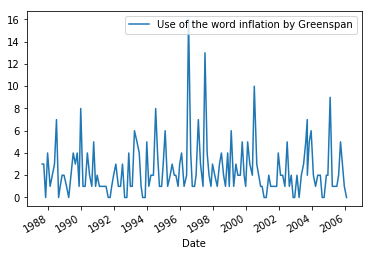

In [39]:
count_greenspan.plot()
plt.xlabel('Date')
plt.legend(['Use of the word inflation by Greenspan'])

In [40]:
data_fedtar = pd.read_excel (r'../Data/DFEDTAR.xls')

In [41]:
data_fedtar_meetings = data_fedtar[data_fedtar.observation_date.isin(dates_meetings.tolist())]

In [42]:
data_fedtar_meetings.head(2)

,observation_date,DFEDTAR
1786,1987-08-18,6.625
1821,1987-09-22,7.250


In [43]:
data_fedtar_meetings.set_index('observation_date', inplace=True)

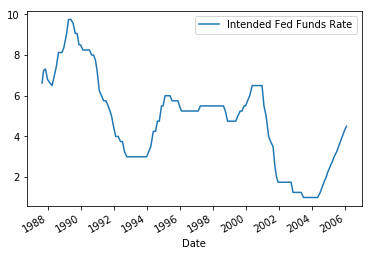

In [44]:
data_fedtar_meetings.plot()
plt.xlabel('Date')
plt.legend(['Intended Fed Funds Rate'])

## b) Mean Function and Autocovariance Function

We now have to time series indexed by the meeting date of the FOMC. We are going to start thinking about the statistical properties of these time series.  

The **mean function** of a real-valued time series is the function
$$\mu_{X}: \{1,\dots T\} \rightarrow \mathbb{R}$$
defined by:
$$\mu_{X}(t) \equiv E[X_t]$$

The mean function is one of the features of a time series model that allows us to understand how the marginal distributions of a time series changes over time. 


The mean function is a population object, so we usually think of it as being unknown. The goal is to try to estimate it using the data. Of course, if the mean function varies too much; there is no chance to learn anything about the it. 

A typical assumption imposed in time series analysis is called *mean stationarity*, this means that

$$ \mu_X(t) = \mu.$$

That is, the mean function does not depend on $t$.  

Under certain conditions, we can estimate the mean of a mean stationary time series model by using the sample average; that is:

$$ \widehat{\mu}_{T} = \frac{1}{T} \sum_{t=1}^{T} X_t $$

We can estimate the mean function of the federal funds rate target by doing:

In [50]:
data_fedtar_meetings["DFEDTAR"].mean()

4.78

In the same way, we can compute the frequency with which Greenspan used the word inflation

In [52]:
count_greenspan[0].mean()

2.486666666666667

(note the difference in indexing)

 The mean function is only one piece of the information contained in time series data. 

The **covariance function** of a real-valued time series is the function:

$$ \gamma_{X}: \{1,\ldots, T\} \times \{1, \ldots, T\} \rightarrow \mathbb{R} $$

defined by:

$$\gamma_{X}(s,t) \equiv \textrm{Cov} ( X_s, X_t ) $$

The *autocorrelation function* is simply defined as

$$ \rho_{X}(r,s) = \gamma_X(r,s) / \sqrt{\gamma_{X}(r,r)} \sqrt{\gamma_{X}(s,s)}   $$


To plot the autocorrelation function we will import the [plot_acf](http://www.statsmodels.org/devel/generated/statsmodels.graphics.tsaplots.plot_acf.html) function from the statsmodels.graphics.tsaplots

In [70]:
from statsmodels.graphics.tsaplots import plot_acf

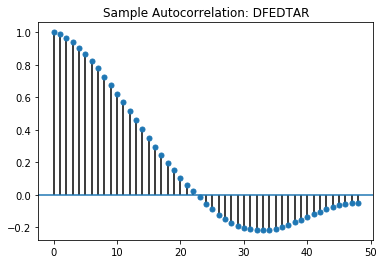

In [88]:
acffedtar=plot_acf(data_fedtar_meetings["DFEDTAR"],lags=48, alpha=1, title='Sample Autocorrelation: DFEDTAR')

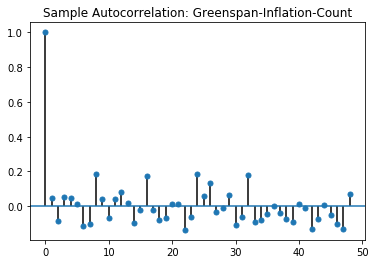

In [89]:
acfgreen=plot_acf(count_greenspan[0],lags=48, alpha=1,title='Sample Autocorrelation: Greenspan-Inflation-Count')

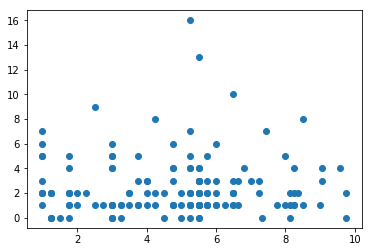

In [45]:
plt.scatter(data_fedtar_meetings["DFEDTAR"], count_greenspan[0])

In [46]:
import numpy as np

In [49]:
np.corrcoef(data_fedtar_meetings["DFEDTAR"], count_greenspan[0])[0 , 1]

0.028990747932219993

In [52]:
import statsmodels.api as sm

To finish this class we will run a regression between the counts of inflation and the fed funds target. One of the things we will learn in this course is how to construct the 'right' standard errors.

One way of running a linear regression in python is by using the module 'statsmodels.api' 

The Quant Econ website has a nice explanation of how it works:

https://lectures.quantecon.org/py/ols.html


In [99]:
count_greenspan[1]=1

In [97]:
resultsols=sm.OLS(endog=data_fedtar_meetings["DFEDTAR"],exog=count_greenspan[[0,1]] ,missing='drop').fit(cov_type='HAC',cov_kwds={'maxlags':1})

In [98]:
print(resultsols.summary())

                            OLS Regression Results                            
Dep. Variable:                DFEDTAR   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.1637
Date:                Tue, 29 Jan 2019   Prob (F-statistic):              0.686
Time:                        15:44:00   Log-Likelihood:                -333.64
No. Observations:                 150   AIC:                             671.3
Df Residuals:                     148   BIC:                             677.3
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.0270      0.067      0.405      0.6